# Network analysis for coauthors - collaborativeness and its impact on species description

This looks at how a person who is more collaborative may result in greater species described.

**Not used in main text.**

In [36]:
%load_ext autoreload
%autoreload 2

from src.util import load_coauthor_nx, ddir, fn_nodes

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
(G, nodes) = load_coauthor_nx() # abstracted into src

N nodes 361 ; N not nodes: 368
Proportion who did not coauthor 50.48010973936899
Name: 
Type: Graph
Number of nodes: 361
Number of edges: 463
Average degree:   2.5651


In [38]:
# Data wrangling
fn_spp = ddir + '2019-05-23-Apoidea world consensus file Sorted by name 2019 describers_2.0-denormalised.csv'
spp = pd.read_csv(fn_spp)[["idx", "full.name.of.describer.n"]]
spp = spp[spp.duplicated(subset="idx", keep=False)] # keep only those with >1 authors

spp_counts = spp.groupby('full.name.of.describer.n').agg('count')
spp_counts_valid = spp[spp.idx<=20669].groupby('full.name.of.describer.n').agg('count')
spp_counts.columns = ['collab_spp_N']
spp_counts_valid.columns = ['collab_ns_spp_N']
spp_counts = spp_counts.merge(spp_counts_valid, "outer", on="full.name.of.describer.n")

auth = pd.read_csv(fn_nodes)[["full.name.of.describer.n", "ns_spp_N", "syn_spp_N", "spp_N", "spp_N_not_1st_auth",
                              "spp_N_1st_auth", "spp_N_1st_auth_s", "spp_N_lst_auth"]]
spp_counts = spp_counts.merge(auth, "outer", on="full.name.of.describer.n")

nodes = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient="index")
n = nodes[['degree', 'betweenness', 'eigenvector']].reset_index()
n.columns = ['full.name.of.describer.n', 'degree', 'betweenness', 'eigenvector']

spp_counts = spp_counts.merge(n, "outer", on="full.name.of.describer.n")
spp_counts = spp_counts[spp_counts['collab_spp_N'].notna()]
spp_counts = spp_counts[spp_counts['degree'].notna()]

In [39]:
def reg_xy(x, y, xlab, ylab):

    # statsmodels
    X2 = sm.add_constant(x)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    print(est2.summary())

    # plot
    plt.figure(figsize=(5, 5))
    plt.rc('font', size=12)
    ax = sns.regplot(x=x, y=y)
    ax.set(xlabel=xlab, ylabel=ylab)

                            OLS Regression Results                            
Dep. Variable:           collab_spp_N   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     631.5
Date:                Fri, 08 Nov 2019   Prob (F-statistic):           4.05e-81
Time:                        22:56:02   Log-Likelihood:                -1426.2
No. Observations:                 361   AIC:                             2856.
Df Residuals:                     359   BIC:                             2864.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0030      0.833     -2.405      0.0

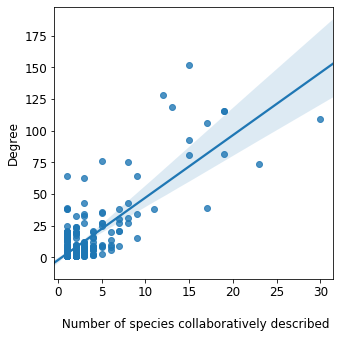

In [40]:
x = spp_counts['degree']
y = spp_counts['collab_spp_N']
xlab = '\n Number of species collaboratively described'
ylab = 'Degree'

reg_xy(x, y, xlab, ylab)

                            OLS Regression Results                            
Dep. Variable:                  spp_N   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     30.70
Date:                Fri, 08 Nov 2019   Prob (F-statistic):           5.84e-08
Time:                        23:45:28   Log-Likelihood:                -2613.6
No. Observations:                 361   AIC:                             5231.
Df Residuals:                     359   BIC:                             5239.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.6253     22.339     -0.834      0.4

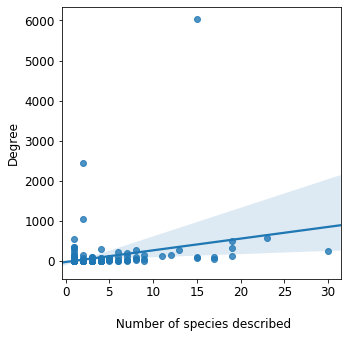

In [55]:
x = spp_counts['degree']
y = spp_counts['spp_N']
xlab = '\n Number of species described'
ylab = 'Degree'

reg_xy(x, y, xlab, ylab)

                            OLS Regression Results                            
Dep. Variable:       spp_N_1st_auth_s   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     25.82
Date:                Fri, 08 Nov 2019   Prob (F-statistic):           6.03e-07
Time:                        23:45:57   Log-Likelihood:                -2609.8
No. Observations:                 361   AIC:                             5224.
Df Residuals:                     359   BIC:                             5231.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.8651     22.107     -0.763      0.4

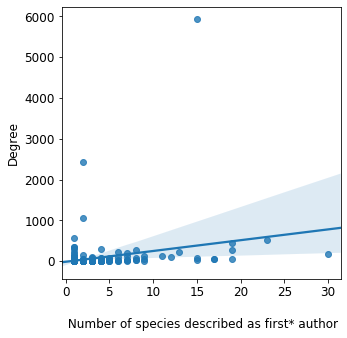

In [56]:
x = spp_counts['degree']
y = spp_counts['spp_N_1st_auth_s']
xlab = '\n Number of species described as first* author'
ylab = 'Degree'

reg_xy(x, y, xlab, ylab)

                            OLS Regression Results                            
Dep. Variable:         spp_N_lst_auth   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     119.6
Date:                Fri, 08 Nov 2019   Prob (F-statistic):           3.24e-24
Time:                        23:46:02   Log-Likelihood:                -596.12
No. Observations:                 361   AIC:                             1196.
Df Residuals:                     359   BIC:                             1204.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1614      0.084     -1.932      0.0

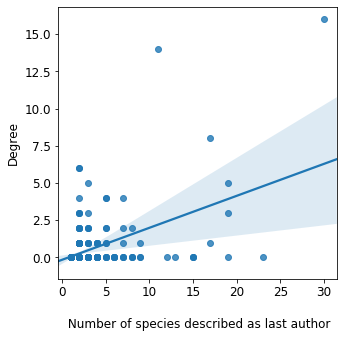

In [57]:
x = spp_counts['degree']
y = spp_counts['spp_N_lst_auth']
xlab = '\n Number of species described as last author'
ylab = 'Degree'

reg_xy(x, y, xlab, ylab)

In [51]:
spp_counts.columns

Index(['full.name.of.describer.n', 'collab_spp_N', 'collab_ns_spp_N',
       'ns_spp_N', 'syn_spp_N', 'spp_N', 'spp_N_not_1st_auth',
       'spp_N_1st_auth', 'spp_N_1st_auth_s', 'spp_N_lst_auth', 'degree',
       'betweenness', 'eigenvector'],
      dtype='object')